In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score


In [2]:
df = pd.read_csv('/home/sheela/Downloads/WHO_LIFE_EXPECTANCY/Life Expectancy Data.csv')
df.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [6]:
# 'filling missing values

# df[['Life expectancy' ,'Adult Mortality' , 'Alcohol'] ] = df[['Alcohol','Life expectancy','Adult Mortality']].fillna(df[['Life expectancy','Adult Mortality' , 'Alcohol']].mean())
# df['Schooling'] = df['Schooling'].fillna(df['Schooling'].mode()[0])
# df[['Population','Hepatitis B']] = df[['Population','Hepatitis B']].fillna(df[['Population','Hepatitis B']].median())


In [7]:
mean_column = ['Life expectancy' ,'Adult Mortality' , 'Alcohol' ]
median_column = ['Population','Hepatitis B','BMI',
    'Polio',
    'Total expenditure',
    'Diphtheria',
    'GDP',
    'Income composition of resources']



In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [9]:
df.columns = df.columns.str.strip()

In [10]:
for col in df.columns:
    if df[col].dtype == object:
#         df[col] = df[col].fillna([col].mode()[0])
        df[col] = df[col].fillna(df[col].mode()[0])  # No need for list
    elif pd.api.types.is_numeric_dtype(df[col]):
        if col in mean_column:
            df[col] = df[col].fillna(df[col].mean())
        elif col in median_column:
                 df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna(df[col].mean())  # Default to mean if not specified
        
print(df.isnull().sum())
            

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64


In [11]:
df.duplicated().any()

False

In [12]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [13]:
any_duplicates = df.duplicated(subset= ['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling']).any()

In [14]:
any_duplicates

False

# Scatter Plot

# infant death vs measles

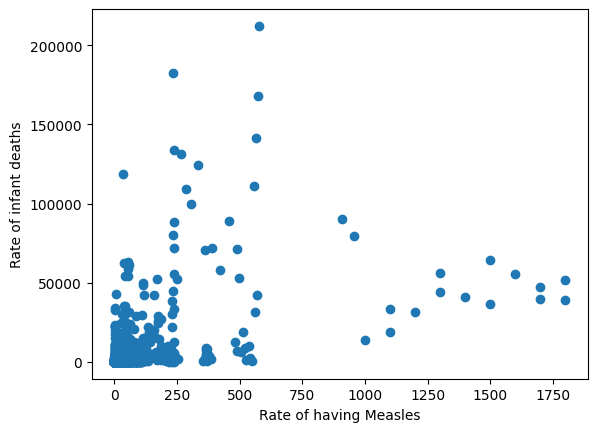

In [15]:
plt.scatter(df['infant deaths'] , df['Measles'])
plt.xlabel("Rate of having Measles")
plt.ylabel("Rate of infant deaths")
plt.show()

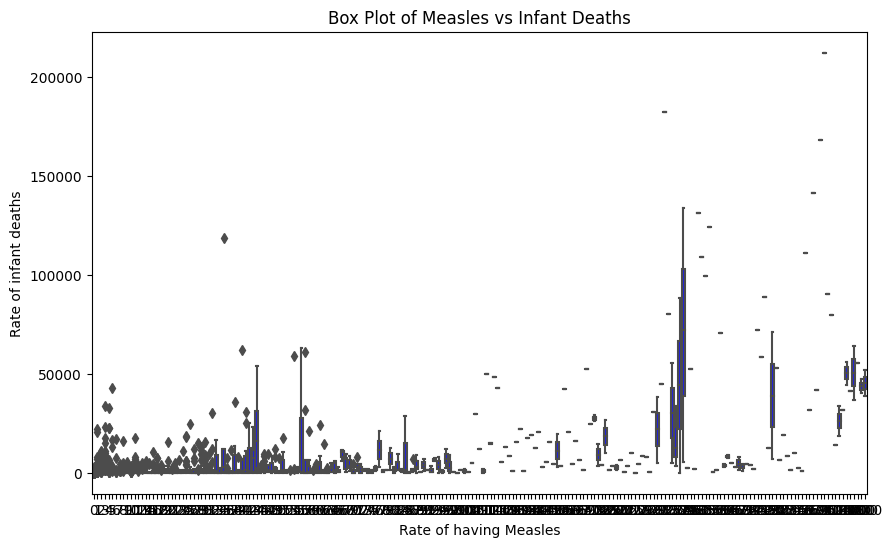

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df , x='infant deaths' , y = 'Measles' , color = 'Blue')
plt.xlabel("Rate of having Measles")
plt.ylabel("Rate of infant deaths")
plt.title("Box Plot of Measles vs Infant Deaths")
plt.show()

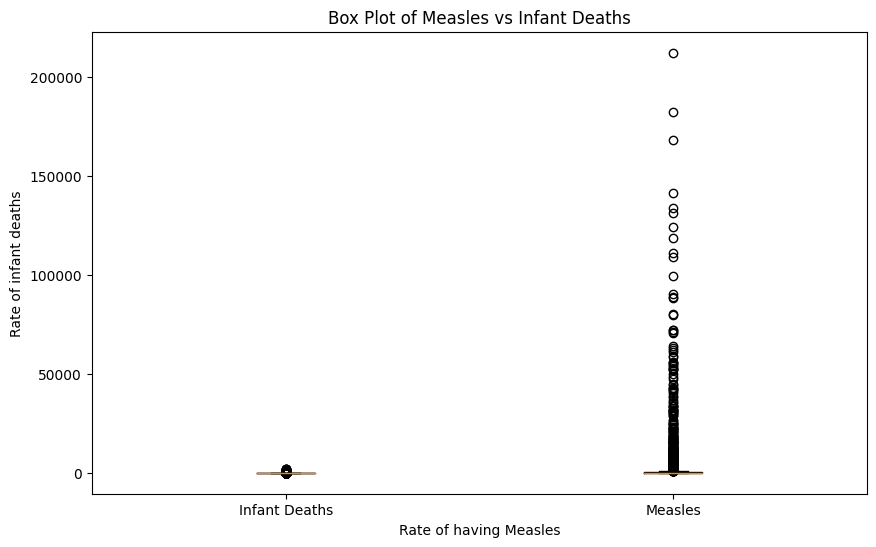

In [17]:
plt.figure(figsize=(10, 6))
plt.boxplot([df['infant deaths'], df['Measles']], labels=['Infant Deaths', 'Measles'])
plt.xlabel("Rate of having Measles")
plt.ylabel("Rate of infant deaths")
plt.title("Box Plot of Measles vs Infant Deaths")
plt.show()

In [18]:
label_encoder = LabelEncoder()

for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])




In [19]:
# plt.hist(df['infant deaths'] , df['Measles'])
# plt.xlabel("Rate of having Measles")
# plt.ylabel("Rate of infant deaths")
# plt.show()

In [20]:
#     The corr method computes the correlation coefficient between every pair of numerically-valued columns 
#     in a DataFrame. The Pearson correlation coefficient measures the linear relationship between two variables,
#     ranging from -1 to +1, where:

#         +1 indicates a perfect positive linear relationship,
#         -1 indicates a perfect negative linear relationship,
#         0 indicates no linear relationship.


In [21]:

# Calculate Pearson correlation coefficient relation(default in pandas)
corr_matrix = df.corr()
print(corr_matrix)


                                  Country      Year    Status   
Country                          1.000000  0.001342 -0.031635  \
Year                             0.001342  1.000000  0.001864   
Status                          -0.031635  0.001864  1.000000   
Life expectancy                 -0.016745  0.169623 -0.481962   
Adult Mortality                  0.039760 -0.078861  0.315171   
infant deaths                   -0.030528 -0.037415  0.112252   
Alcohol                         -0.060052 -0.048168 -0.579371   
percentage expenditure          -0.032983  0.031400 -0.454261   
Hepatitis B                     -0.014544  0.021302 -0.127008   
Measles                         -0.024593 -0.082493  0.076955   
BMI                              0.021112  0.108484 -0.309371   
under-five deaths               -0.026509 -0.042937  0.115195   
Polio                            0.020327  0.091388 -0.218628   
Total expenditure                0.052719  0.074552 -0.290431   
Diphtheria               

From above correlation result we conclude about certain things comparing with life expectancy:
    
1) Life expectancy and Schooling have a high positive correlation (0.710), which suggests that countries
 with higher schooling years tend to have higher life expectancies.
2) Adult Mortality and Life expectancy have a strong negative correlation (-0.696), meaning that as adult 
 mortality increases, life expectancy decreases.
3) Income composition of resources and Life expectancy are also strongly correlated (0.688), 
 indicating that countries with better access to income and resources tend to have longer life expectancies.

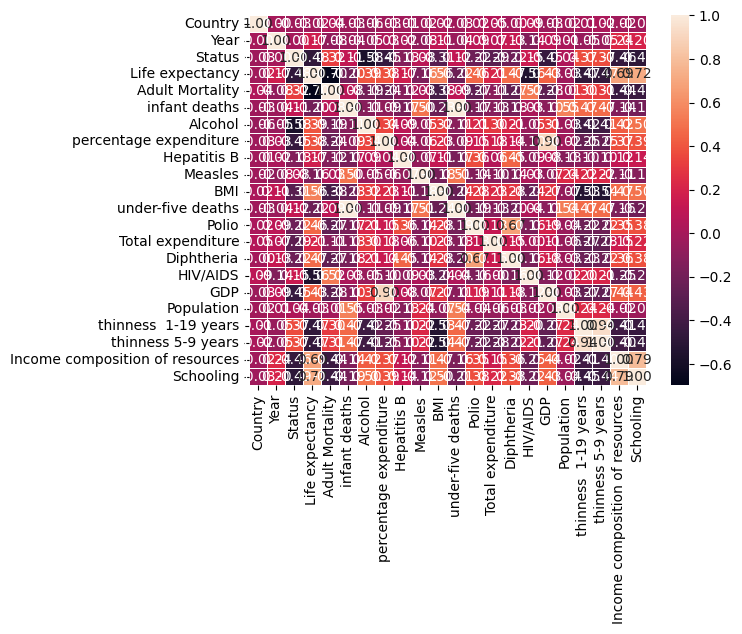

In [22]:
sns.heatmap(corr_matrix , annot = True,fmt='.2f', linewidths=.5)

plt.show()

In [23]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index([], dtype='object')


# Trend analysis

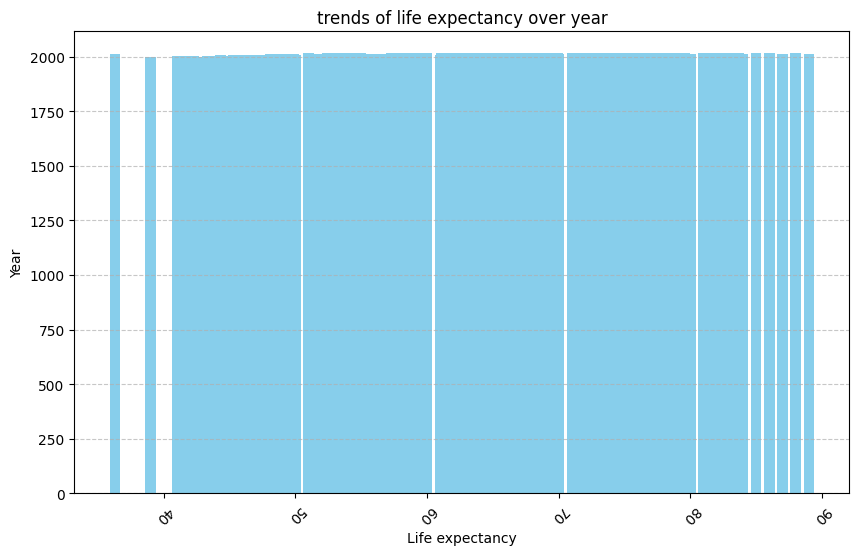

In [24]:
plt.figure(figsize= (10,6))
plt.bar(df['Life expectancy'] , df['Year'] ,  color='skyblue')
plt.title("trends of life expectancy over year")
plt.xlabel("Life expectancy")
plt.ylabel("Year")
plt.xticks(rotation=945)  # Rotate x-axis labels if there are many years
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [25]:
df_cleaned = df.dropna()

In [37]:

X = df[["Country", "Adult Mortality", "infant deaths", "Alcohol", "percentage expenditure", "Income composition of resources"]]
Y = df['Life expectancy']  # Dependent variable

#split data
x_train , x_test , y_train , y_test = train_test_split(X, Y , test_size = 0.3 , random_state = 42)

#preprocess data
scaler = StandardScaler()
x_trained_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Evaluate Model
model = LinearRegression()
model.fit(x_trained_scaled , y_train)

#Cross validation
scores = cross_val_score(model, X, Y, cv=5, scoring='neg_mean_squared_error')  # cv=5 means 5-fold cross-validation

# Convert negative mean squared error to positive
scores = -scores
print(f"Cross-validation Mean MSE: {np.mean(scores):.2f}")
print(f"Cross-validation Standard Deviation of MSE: {np.std(scores):.2f}")

y_pred = model.predict(x_test_scaled)
mae = mean_squared_error(y_test , y_pred)
r2 = r2_score(y_test, y_pred) 


# Example: Print the first few actual and predicted values for comparison
print("Actual values (y_test):", y_test[:5])  # First 5 actual values
print("Predicted values (y_pred):", y_pred[:5])  # First 5 predicted values


Cross-validation Mean MSE: 32.86
Cross-validation Standard Deviation of MSE: 5.38
Actual values (y_test): 2546    73.7
650     75.9
1740    74.2
177     76.8
1377    51.9
Name: Life expectancy, dtype: float64
Predicted values (y_pred): [70.08166375 76.12855422 73.50054643 77.92678169 55.03579432]


Cross-validation Mean MSE (Mean Squared Error): 32.86
This value indicates the average squared difference between the actual and predicted values across the folds. 
A lower MSE value means better model performance, as it signifies smaller differences between predicted and 
actual values.

Cross-validation Standard Deviation of MSE: 5.38
This value measures the variability in the MSE across different folds. A higher standard deviation indicates
that the models performance varies significantly between different folds. A lower standard deviation suggests
more consistent performance.



In [31]:
import warnings
warnings.filterwarnings('ignore')

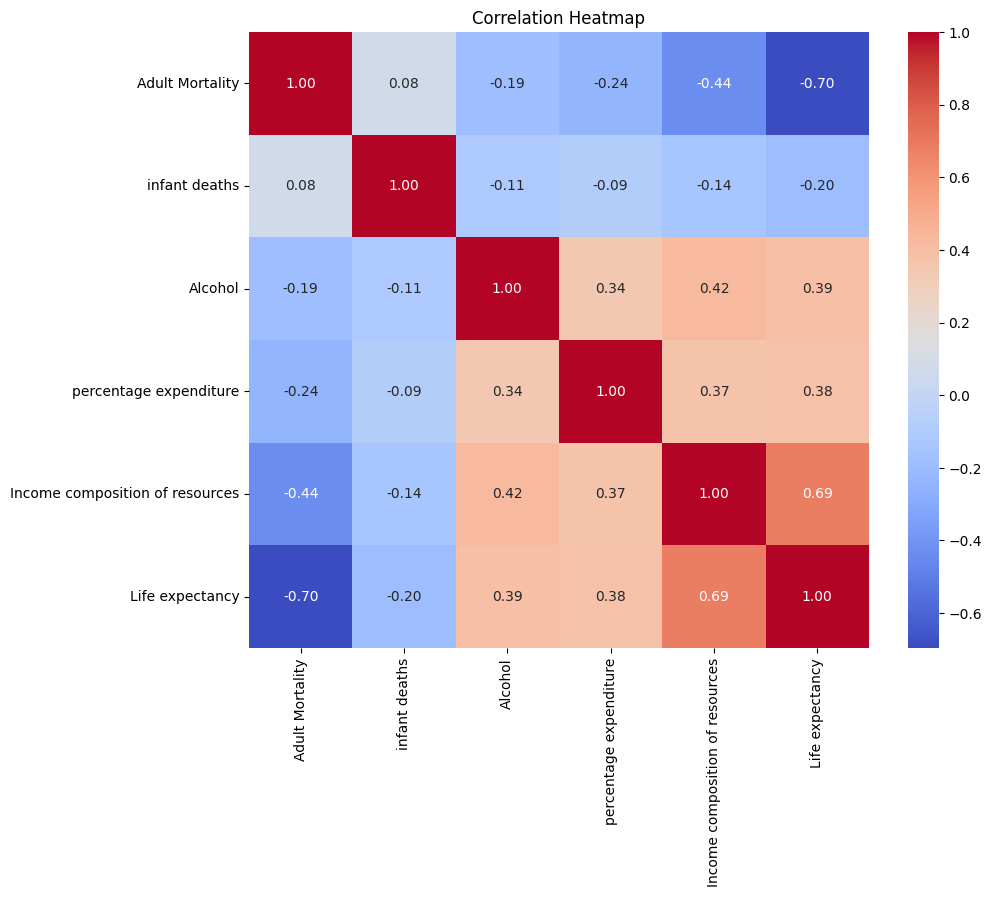

In [28]:
# Calculate correlation matrix
correlation_matrix = df[['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Income composition of resources', 'Life expectancy']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


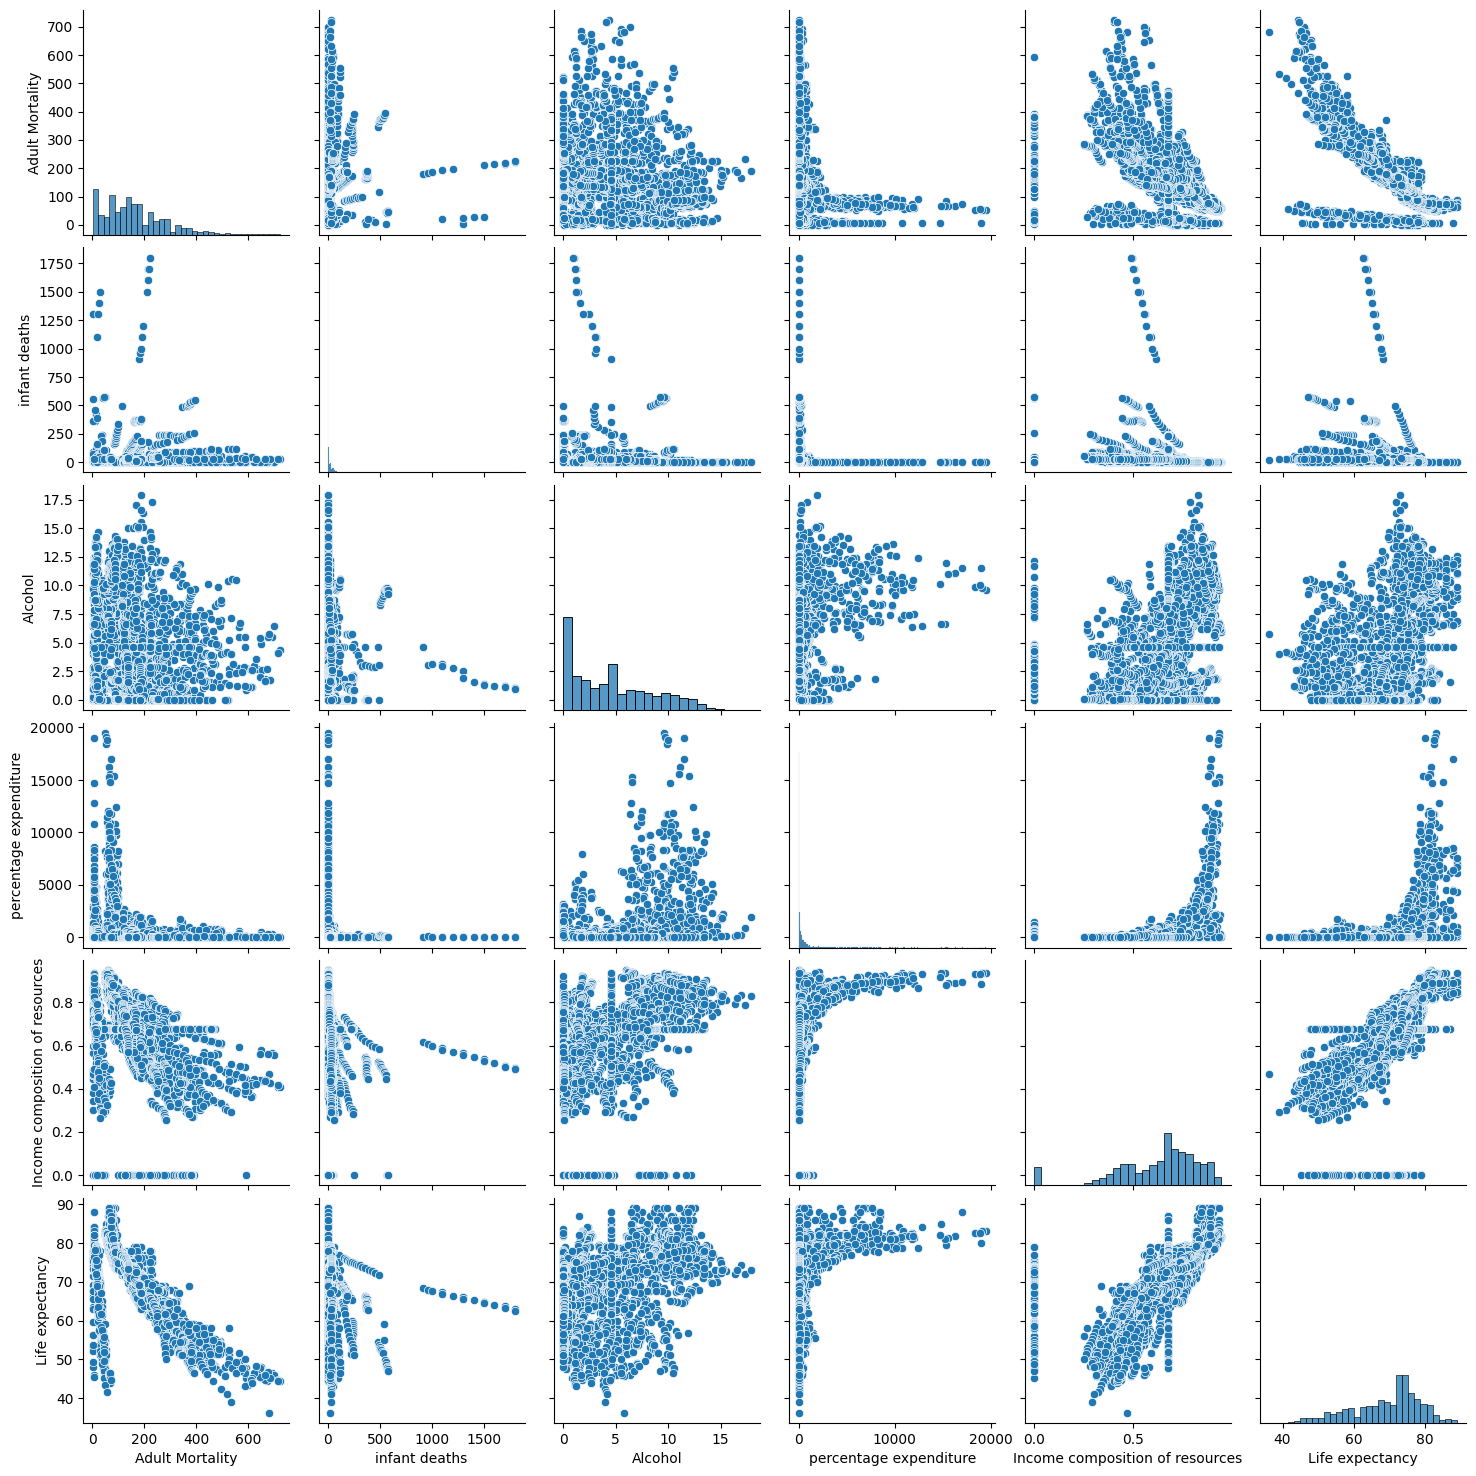

In [33]:
sns.pairplot(df[['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Income composition of resources', 'Life expectancy']])
plt.show()
